In [0]:
import numpy as np
import pandas as pd
from pandas_datareader import data as wb
from scipy.stats import norm
import matplotlib.pyplot as plt
%matplotlib inline

In [0]:
ticker = 'PG'
data = pd.DataFrame()
data[ticker] = wb.DataReader(ticker, data_source='yahoo', start='2007-1-1', end='2017-3-21')['Adj Close']

In [0]:
log_returns = np.log(1 + data.pct_change())

In [0]:
r = 0.025

In [43]:
stdev = log_returns.std() * 250 ** 0.5
stdev

PG    0.176551
dtype: float64

In [44]:
type(stdev)

pandas.core.series.Series

In [45]:
stdev = stdev.values
stdev

array([0.17655053])

In [0]:
T = 1.0
t_intervals = 250
delta_t = T / t_intervals

iterations = 10000

In [0]:
Z = np.random.standard_normal((t_intervals + 1, iterations))
S = np.zeros_like(Z)
S0 = data.iloc[-1]
S[0] = S0

In [0]:
for t in range(1, t_intervals + 1):
  S[t] = S[t-1] * np.exp((r - 0.5 * stdev ** 2) * delta_t + stdev * delta_t ** 0.5 * Z[t])

In [49]:
S

array([[ 83.24195862,  83.24195862,  83.24195862, ...,  83.24195862,
         83.24195862,  83.24195862],
       [ 82.34635838,  83.31747345,  83.77663831, ...,  82.74392163,
         82.63345935,  83.76380568],
       [ 81.82684213,  82.20897011,  82.9309309 , ...,  81.52439529,
         81.31820515,  84.19871259],
       ...,
       [ 55.51010839, 129.76896795,  89.8443763 , ...,  61.84822543,
         78.25433486,  88.7468881 ],
       [ 55.78194723, 132.20279896,  88.86558481, ...,  62.17369183,
         78.36586579,  88.24711325],
       [ 55.341341  , 131.93349427,  87.62828829, ...,  63.29798726,
         79.65534304,  87.27928573]])

In [50]:
S.shape

(251, 10000)

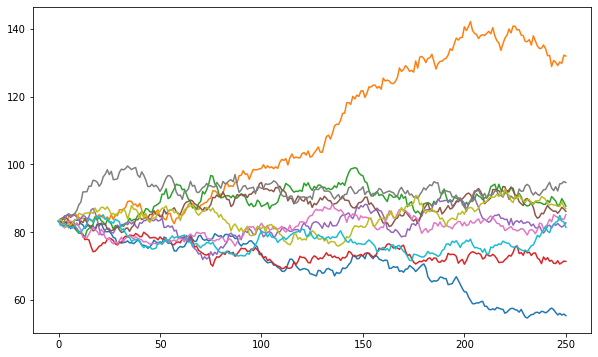

In [51]:
plt.figure(figsize=(10, 6))
plt.plot(S[:, :10]);

In [0]:
p = np.maximum(S[-1] - 110, 0)

In [53]:
p

array([ 0.        , 21.93349427,  0.        , ...,  0.        ,
        0.        ,  0.        ])

In [54]:
p.shape

(10000,)

In [55]:
C = np.exp(-r * T) * np.sum(p) / iterations
C

0.5745458296552303